In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("dark_background")

In [2]:
np.random.seed(67)

samples = 400
x1 = np.random.randn(samples) * 7.5 + 4.7
x2 = np.random.randn(samples) * (-9.8) - 7
X = np.column_stack((x1, x2))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

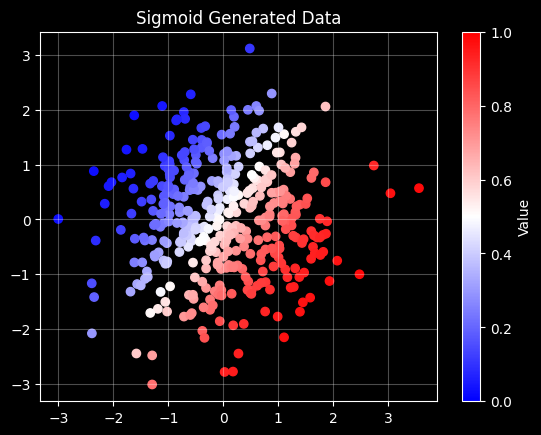

In [3]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

y = sigmoid(1.2 * X_scaled[:, 0] + (-0.9) * X_scaled[:, 1] + 0.12)

sig_data = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap="bwr", vmin=0, vmax=1)
color_bar = plt.colorbar(sig_data)
color_bar.set_label("Value")

plt.title("Sigmoid Generated Data")
plt.grid(True, alpha=0.3)
plt.show()

Epoch 1: BCE error = 0.7646568018307611
Epoch 2: BCE error = 0.5437733405262908
Epoch 3: BCE error = 0.5282170526205461
Epoch 4: BCE error = 0.5270944865058435
Epoch 5: BCE error = 0.5269175467903195
Epoch 6: BCE error = 0.5268661654406357
Epoch 7: BCE error = 0.5268478423788211
Epoch 8: BCE error = 0.5268409634659537
Epoch 9: BCE error = 0.5268383415308852
Epoch 10: BCE error = 0.5268373360254391


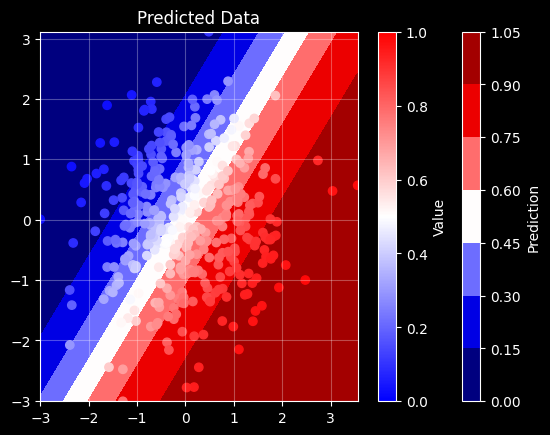

In [4]:
np.random.seed(67)

w = np.random.randn(2)
b = np.random.randn()

lr = 0.01
epochs = 10

def predict(X):
    global w, b
    z = X @ w + b
    y = sigmoid(z)
    return y

for i in range(epochs):
    y_pred = predict(X_scaled)

    dBCE_dz = y_pred - y

    dz_dw = X_scaled.T
    dz_db = np.ones((1, y.size))

    w -= lr * (dz_dw @ dBCE_dz)
    b -= lr * (dz_db @ dBCE_dz)

    eps = 1e-15
    print(f"Epoch {i + 1}: BCE error = {np.mean(-(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps)))}")

x_min, x_max = np.min(X_scaled[:, 0]), np.max(X_scaled[:, 0])
y_min, y_max = np.min(X_scaled[:, 1]), np.max(X_scaled[:, 1])

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 100),
    np.linspace(y_min, y_max, 100)
)

X_contour = np.c_[xx.ravel(), yy.ravel()]
contour_data = predict(X_contour)
plt.contourf(xx, yy, contour_data.reshape(xx.shape), cmap="seismic")
plt.colorbar(label="Prediction")

sig_data = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap="bwr", vmin=0, vmax=1)
color_bar = plt.colorbar(sig_data)
color_bar.set_label("Value")

plt.title("Predicted Data")
plt.grid(True, alpha=0.3)
plt.show()